# <font color = blue> IMDb Movie EDA </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

In [0]:
# Importing the required libraries
from pyspark.sql.functions import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [0]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

moviespd = pd.read_csv("FileStore/tables/IMDB_Movies.csv")

---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
File <command-3842500994332805>:3
      1 # Read the csv file using 'read_csv'. Please write your dataset location here.
----> 3 moviespd = pd.read_csv("/FileStore/tables/IMDB_Movies.csv")

File /databricks/python/lib/python3.9/site-packages/pandas/util/_decorators.py:311, in deprecate_nonkeyword_arguments.<locals>.decorate.<locals>.wrapper(*args, **kwargs)
    305 if len(args) > num_allow_args:
    306     warnings.warn(
    307         msg.format(arguments=arguments),
    308         FutureWarning,
    309         stacklevel=stacklevel,
    310     )
--> 311 return func(*args, **kwargs)

File /databricks/python/lib/python3.9/site-packages/pandas/io/parsers/readers.py:680, in read_csv(filepath_or_buffer, sep, delimiter, header, names, index_col, usecols, squeeze, prefix, mangle_dupe_cols, dtype, engine, converters, true_values, false_v

In [0]:
moviespd.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Flipkart Data Engineering").getOrCreate()
file_path = '/FileStore/tables/IMDB_Movies.csv'
movies = spark.read.csv(file_path, header=True, inferSchema=True)

- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [0]:
# Check the number of rows and columns in the dataframe
#movies.shape
print(movies.count(),len(movies.columns))

100 62


In [0]:
# Check the column-wise info of the dataframe
#movies.info()
display(movies.printSchema())

root
 |-- Title: string (nullable = true)
 |-- title_year: integer (nullable = true)
 |-- budget: integer (nullable = true)
 |-- Gross: integer (nullable = true)
 |-- actor_1_name: string (nullable = true)
 |-- actor_2_name: string (nullable = true)
 |-- actor_3_name: string (nullable = true)
 |-- actor_1_facebook_likes: integer (nullable = true)
 |-- actor_2_facebook_likes: integer (nullable = true)
 |-- actor_3_facebook_likes: integer (nullable = true)
 |-- IMDb_rating: double (nullable = true)
 |-- genre_1: string (nullable = true)
 |-- genre_2: string (nullable = true)
 |-- genre_3: string (nullable = true)
 |-- MetaCritic: integer (nullable = true)
 |-- Runtime: integer (nullable = true)
 |-- CVotes10: integer (nullable = true)
 |-- CVotes09: integer (nullable = true)
 |-- CVotes08: integer (nullable = true)
 |-- CVotes07: integer (nullable = true)
 |-- CVotes06: integer (nullable = true)
 |-- CVotes05: integer (nullable = true)
 |-- CVotes04: integer (nullable = true)
 |-- CVotes

In [0]:
# Check the summary for the numeric columns 
#movies.describe()
display(movies.describe())

summary,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
count,100,100,100,100,100,100,100,100,99,98,100,100,97,74,95,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
mean,null,2012.82,7.8384E7,1.4686786724E8,null,null,0.0,13407.27,7377.30303030303,3002.1530612244896,7.883000000000005,null,null,null,78.25263157894737,126.42,73212.16,92404.17,125762.23,76715.28,27841.45,10171.75,4330.11,2477.07,1711.57,4084.35,271446.18,64468.86,1769.05,1318.95,435.66,165863.77,128473.14,35739.71,124561.1,103437.92,19371.54,24170.16,19653.26,4093.53,624.37,54096.74,188245.68,7.852000000000001,7.910000000000002,8.205000000000002,8.174000000000003,8.214999999999998,8.005000000000003,8.005000000000003,7.982000000000003,7.731999999999997,7.722999999999997,7.780000000000004,7.651,7.623999999999996,7.77,7.2740000000000045,7.958000000000003,7.793000000000003,null,null
stddev,null,1.9194906731850856,7.445294727259466E7,1.454003701299839E8,null,null,null,10649.037862220703,13471.568215799898,6940.301133358087,0.247433288631971,null,null,null,9.12206632649366,19.050798652364403,82669.59474649609,75666.91877451727,62162.75248118826,32586.3586238974,12883.912563226615,5480.914204092805,2713.608901556387,1768.1675057482078,1318.6311639596781,3489.77840277933,167658.01570575597,39117.95482792519,1324.5228176382782,1040.9593610771465,366.49999572808576,103522.93235555117,83188.72525721016,23092.041366466634,72089.24535860907,61116.37472683659,11324.680698261465,12841.696512831812,10669.041306338804,2187.9556550775565,133.244262294267,32115.288161707263,106902.25634661589,0.26303588878303064,0.29831174799175847,0.30595932917809704,0.3580587390443929,0.38148434178915297,0.2716857215849435,0.2819037015892069,0.32141731582024435,0.25181362355937187,0.26047935609083295,0.28212755908623965,0.21485019446257456,0.21325756230152285,0.3013437917198243,0.36198666195640855,0.23232683352500996,0.26409938441519476,null,null
min,12 Years a Slave,2010,3000000,223838,Aidan Turner,Adam Brown,0,39,12,0,7.5,Action,Action,Adventure,62,91,6420,7321,11668,8558,3370,1162,456,227,158,293,22441,9552,121,95,20,15959,10150,4370,12174,9280,2682,1899,1496,355,198,3678,19009,7.4,7.3,7.5,7.4,7.2,7.6,7.6,7.3,7.3,7.2,7.2,7.1,7.1,7.0,6.4,7.5,7.3,G,Australia
max,Zootopia,2016,260000000,936662225,Tom Hughes,Will Ferrell,ZoÃ« Kravitz,35000,96000,46000,8.8,Mystery,Western,Western,100,180,584839,485218,304457,162604,67579,27957,12286,7868,5751,15768,1044318,239796,5735,4596,1910,655187,512411,136770,472680,392845,73555,79634,65508,12795,885,212524,707266,8.8,8.7,9.1,9.1,9.0,9.0,9.0,8.8,8.7,8.7,8.5,8.1,8.1,8.5,8.2,8.7,8.8,R,USA


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [0]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

# movies["budget"] = movies["budget"] / 1000000
# movies["Gross"] = movies["Gross"] / 1000000
movies = movies.withColumn("budget", col("budget") / 1000000)
movies = movies.withColumn("Gross", col("Gross") / 1000000)

movies.show()

+--------------------+----------+------+----------+--------------------+------------------+--------------------+----------------------+----------------------+----------------------+-----------+---------+---------+--------+----------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+----------+------------+---------+----------+----------+----------+-----------+-----------+----------+-----------+-----------+---------+----------+----------+----------+--------+---------+------+------+--------+---------+---------+---------+----------+----------+---------+----------+----------+--------+---------+---------+---------+-------+--------+--------------+---------+
|               Title|title_year|budget|     Gross|        actor_1_name|      actor_2_name|        actor_3_name|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|IMDb_rating|  genre_1|  genre_2| genre_3|MetaCritic|Runtime|CVotes10|CVotes09|CVotes08|CVotes07|CVotes06|CVotes

In [0]:
display(movies.limit(10))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000,null,8.2,Comedy,Drama,Music,93,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,78,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000,9800,8.1,Biography,Drama,null,69,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300,null,8.0,Drama,Mystery,Sci-Fi,81,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000,3300,7.9,Drama,null,null,96,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA
Hell or High Water,2016,12.0,27.007844,Chris Pine,Jeff Bridges,Ben Foster,19000,12000,9000,7.7,Crime,Drama,Thriller,88,102,8445,19789,45260,35212,11130,3102,932,475,233,471,88398,10427,564,519,43,41898,37112,4370,40564,36251,3817,10696,9091,1425,403,18746,57907,7.7,7.4,8.1,8.1,7.7,7.7,7.8,7.4,7.5,7.6,7.4,7.6,7.6,7.7,7.3,7.9,7.5,R,USA
Doctor Strange,2016,165.0,232.64192,Benedict Cumberbatch,Chiwetel Ejiofor,Rachel McAdams,19000,null,46000,7.6,Action,Adventure,Fantasy,72,115,38952,51465,102744,83322,32430,10744,3786,1854,1038,2667,202386,42203,2526,1970,540,117060,93330,22484,87961,74305,12327,17122,14163,2629,545,36644,133095,7.5,7.8,8.0,8.0,8.3,7.6,7.6,7.8,7.4,7.4,7.7,7.5,7.4,7.8,7.1,7.6,7.4,PG-13,USA
Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553,284,7.8,Animation,Adventure,Comedy,71,124,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,166088,97213,1950,1048,885,144744,81897,61390,89588,63534,24912,15318,11277,3805,622,47643,148024,7.6,8.2,7.8,7.4,8.3,7.9,7.7,8.2,7.6,7.5,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA
The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,8.4,Action,Thriller,null,78,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA
Captain America: Civil War,2016,250.0,407.197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000,11000,7.9,Action,Adventure,Sci-Fi,75,147,81893,90156,117188,79

-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [0]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column

movies = movies.withColumn("profit", col("Gross") - col("budget"))

display(movies.limit(10))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000,null,8.2,Comedy,Drama,Music,93,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.10180299999999
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,78,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.26824800000003
Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000,9800,8.1,Biography,Drama,null,69,118,23325,29830,40564,20296,5842,1669,558,309,182,493,68921,24977,702,477,220,42962,29729,12780,34297,26384,7413,9054,6714,2184,298,13478,53931,8.0,8.4,8.3,8.2,8.7,8.1,8.0,8.4,8.0,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905
Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300,null,8.0,Drama,Mystery,Sci-Fi,81,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139
Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000,3300,7.9,Drama,null,null,96,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371
Hell or High Water,2016,12.0,27.007844,Chris Pine,Jeff Bridges,Ben Foster,19000,12000,9000,7.7,Crime,Drama,Thriller,88,102,8445,19789,45260,35212,11130,3102,932,475,233,471,88398,10427,564,519,43,41898,37112,4370,40564,36251,3817,10696,9091,1425,403,18746,57907,7.7,7.4,8.1,8.1,7.7,7.7,7.8,7.4,7.5,7.6,7.4,7.6,7.6,7.7,7.3,7.9,7.5,R,USA,15.007843999999999
Doctor Strange,2016,165.0,232.64192,Benedict Cumberbatch,Chiwetel Ejiofor,Rachel McAdams,19000,null,46000,7.6,Action,Adventure,Fantasy,72,115,38952,51465,102744,83322,32430,10744,3786,1854,1038,2667,202386,42203,2526,1970,540,117060,93330,22484,87961,74305,12327,17122,14163,2629,545,36644,133095,7.5,7.8,8.0,8.0,8.3,7.6,7.6,7.8,7.4,7.4,7.7,7.5,7.4,7.8,7.1,7.6,7.4,PG-13,USA,67.64192
Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553,284,7.8,Animation,Adventure,Comedy,71,124,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,166088,97213,1950,1048,885,144744,81897,61390,89588,63534,24912,15318,11277,3805,622,47643,148024,7.6,8.2,7.8,7.4,8.3,7.9,7.7,8.2,7.6,7.5,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.19273799999999
The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,8.4,Action,Thriller,null,78,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.13064200000002
Captain America: Civil War,2016

In [0]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument

movies = movies.orderBy(desc("profit"))
display(movies.limit(10))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,81,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,8.1,Action,Sci-Fi,null,69,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805,361,8.0,Action,Adventure,Comedy,65,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000,523,7.6,Action,Adventure,Mystery,76,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000,721,8.3,Animation,Adventure,Comedy,92,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.98449699999998
The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,8.4,Action,Thriller,null,78,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.13064200000002
The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000,2000,7.8,Animation,Action,Adventure,83,100,41269,50795,83773,55181,21793,8596,3680,2053,1466,2918,180122,37351,1887,1464,414,111043,89180,20677,77271,65191,11020,13346,11079,2032,579,42963,114308,7.8,7.7,8.2,8.2,7.9,7.9,8.0,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,78,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.26824800000003
Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000,975,7.7,Animation,Adventure,Comedy,72,124,56474,66298,136943,102534,35207,11448,4000,1862,1024,1825,251408,91545,2241,1523,700,179397,122880,54800,123041,95843,25612

In [0]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)


display(movies.orderBy(desc('profit')).limit(10))


Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,81,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,8.1,Action,Sci-Fi,null,69,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805,361,8.0,Action,Adventure,Comedy,65,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000,523,7.6,Action,Adventure,Mystery,76,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000,721,8.3,Animation,Adventure,Comedy,92,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.98449699999998
The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,8.4,Action,Thriller,null,78,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.13064200000002
The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000,2000,7.8,Animation,Action,Adventure,83,100,41269,50795,83773,55181,21793,8596,3680,2053,1466,2918,180122,37351,1887,1464,414,111043,89180,20677,77271,65191,11020,13346,11079,2032,579,42963,114308,7.8,7.7,8.2,8.2,7.9,7.9,8.0,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,78,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.26824800000003
Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000,975,7.7,Animation,Adventure,Comedy,72,124,56474,66298,136943,102534,35207,11448,4000,1862,1024,1825,251408,91545,2241,1523,700,179397,122880,54800,123041,95843,25612

In [0]:
#Plot profit vs budget using scatterplot

display(movies.groupBy('budget').agg(sum('profit').alias('Total Profit')))


budget,Total Profit
170.0,195.24154299999998
160.0,118.974222
8.0,26.963966999999997
69.0,182.501645
7.0,33.983001
180.0,123.00122900000002
108.0,120.430993
44.5,91.51944800000001
47.0,53.546139
35.0,74.712885


Databricks visualization. Run in Databricks to view.

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [0]:
#Find the movies with negative profit

display(movies.filter(col('profit')<0))



Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Tucker and Dale vs Evil,2010,5.0,0.223838,Katrina Bowden,Tyler Labine,Chelan Simmons,948,779,440,7.6,Comedy,Horror,null,65,124,16572,19818,44460,35863,13456,4588,1684,855,479,848,106144,15113,219,198,20,52889,45169,7232,56379,49634,6156,8861,7645,1072,540,26213,73918,7.5,7.7,7.7,7.7,8.2,7.6,7.6,7.6,7.5,7.5,7.7,7.5,7.4,7.7,7.1,7.7,7.5,R,Canada,-4.776162
Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432,319,7.9,Drama,Romance,null,94,127,11093,15944,22942,14187,5945,2585,1188,710,534,995,49808,16719,121,95,24,28593,20107,8167,28691,21990,6269,7425,5803,1490,391,7959,46138,7.8,7.9,8.6,8.7,8.5,8.0,8.0,7.9,7.7,7.7,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623
Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000,471,8.1,Action,Biography,Drama,75,123,53667,90907,119603,57343,14948,4436,1625,803,633,1532,246354,35289,888,769,115,138327,119048,17987,105712,92487,11717,20105,17096,2660,593,30738,168519,8.1,8.0,8.3,8.3,8.0,8.3,8.3,8.2,8.0,8.0,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798,581,8.2,Action,Drama,Sport,71,140,74983,96953,106673,52972,16668,5727,2353,1205,1050,2479,270734,31075,673,583,84,153824,136536,16000,117636,105144,11019,15201,12960,1990,586,45342,176397,8.2,8.2,8.5,8.5,8.7,8.4,8.4,8.4,8.0,8.0,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872,767,7.7,Comedy,Drama,Romance,null,124,11354,11050,20808,14372,5412,1848,664,321,230,402,33714,22540,320,108,207,32475,16916,15217,18576,12982,5338,3399,2616,721,275,7362,36050,7.6,7.9,8.0,7.6,8.3,7.9,7.8,8.0,7.5,7.5,7.7,7.4,7.3,7.6,6.4,7.5,7.7,PG,USA,-12.247786
X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000,1000,7.8,Action,Adventure,Sci-Fi,65,132,64428,96219,200144,129352,41945,12861,4799,2349,1448,3182,382107,80444,2075,1612,443,223309,176821,44428,185909,157332,26094,30217,25051,4691,780,87542,257681,7.7,7.9,8.0,7.9,8.3,7.9,7.9,8.0,7.7,7.6,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594628999999998
Scott Pilgrim vs. the World,2010,60.0,31.49427,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000,719,7.5,Action,Comedy,Romance,69,112,47292,48976,79198,59689,28452,13451,6977,4254,3069,6287,208417,45718,1022,791,221,129202,99363,28557,102986,88456,13334,14195,12157,1778,677,56559,150511,7.5,7.4,8.1,8.2,8.0,7.6,7.7,7.5,7.4,7.4,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.50573
Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553,284,7.8,Animation,Adventure,Comedy,71,124,56575,54688,97207,70947,26805,8530,3043,1396,805,1606,166088,97213,1950,1048,885,144744,81897,61390,89588,63534,24912,15318,11277,3805,622,47643,148024,7.6,8.2,7.8,7.4,8.3,7.9,7.7,8.2,7.6,7.5,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.19273799999999
Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854,509,7.9,Action,Adventure,Sci-Fi,71,113,60383,99596,175961,100724,28982,8145,2858,1368,857,1661,341199,45790,1893,1584,292,172016,148814,21495,157476,138752,16463,30965,26562,3820,691,55486,217557,7.9,7.8,8.2,8.1,8.2,8.0,8.0,7.8,7.8,7.8,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mack

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [0]:
# Change the scale of MetaCritic column from 100 to 10

movies = movies.withColumn("MetaCritic", col("MetaCritic") / 10)

display(movies.limit(10))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,8.1,Action,Sci-Fi,null,6.9,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805,361,8.0,Action,Adventure,Comedy,6.5,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000,523,7.6,Action,Adventure,Mystery,7.6,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000,721,8.3,Animation,Adventure,Comedy,9.2,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.98449699999998
The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,8.4,Action,Thriller,null,7.8,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.13064200000002
The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000,2000,7.8,Animation,Action,Adventure,8.3,100,41269,50795,83773,55181,21793,8596,3680,2053,1466,2918,180122,37351,1887,1464,414,111043,89180,20677,77271,65191,11020,13346,11079,2032,579,42963,114308,7.8,7.7,8.2,8.2,7.9,7.9,8.0,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,7.8,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.26824800000003
Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000,975,7.7,Animation,Adventure,Comedy,7.2,124,56474,66298,136943,102534,35207,11448,4000,1862,1024,1825,251408,91545,2241,1523,700,179397,122880,54800,123041,95

In [0]:
# Find the average ratings including MetaCritic and IMDb_rating

movies = movies.withColumn("Avg_rating", (col("MetaCritic") + col("IMDb_rating")) / 2)

display(movies.limit(10))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.1
The Avengers,2012,220.0,623.279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,8.1,Action,Sci-Fi,null,6.9,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,403.279547,7.5
Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805,361,8.0,Action,Adventure,Comedy,6.5,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000,523,7.6,Action,Adventure,Mystery,7.6,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.6
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000,721,8.3,Animation,Adventure,Comedy,9.2,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.98449699999998,8.75
The Dark Knight Rises,2012,250.0,448.130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,8.4,Action,Thriller,null,7.8,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,198.13064200000002,8.1
The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000,2000,7.8,Animation,Action,Adventure,8.3,100,41269,50795,83773,55181,21793,8596,3680,2053,1466,2918,180122,37351,1887,1464,414,111043,89180,20677,77271,65191,11020,13346,11079,2032,579,42963,114308,7.8,7.7,8.2,8.2,7.9,7.9,8.0,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197,8.05
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,7.8,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.26824800000003,7.949999999999999
Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000,975,7.7,Animation,Adventure,Comedy,7.2,124,56474,66298,136943,102534,35207,11448,4000,1862,1024,1

In [0]:
#Sort in descending order of average rating

movies = movies.orderBy(desc("Avg_rating"))
display(movies.limit(10))


Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
Boyhood,2014,4.0,25.3592,Ellar Coltrane,Lorelei Linklater,Libby Villari,230,193,127,7.9,Drama,null,null,10.0,165,49673,62055,76838,52238,23789,10431,4906,3071,2248,5086,183807,51558,1393,995,381,123006,92639,29076,81594,65261,15118,17881,13995,3567,559,36433,134679,8.0,7.7,8.1,8.1,8.0,8.1,8.1,7.8,7.8,7.8,7.6,7.7,7.7,7.7,7.2,8.0,7.9,R,USA,21.3592,8.95
12 Years a Slave,2013,20.0,56.66787,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660,500,8.1,Biography,Drama,History,9.6,134,75556,126223,161460,83070,27231,9603,4021,2420,1785,4739,313823,82012,1837,1363,457,200910,153669,45301,138762,112943,23895,29252,23072,5726,664,53328,224519,8.1,8.1,8.4,8.4,8.5,8.2,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.66787,8.85
Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767,384,8.2,Animation,Adventure,Comedy,9.4,95,87509,113244,119801,67153,24210,8542,3349,1872,1123,3450,244433,79081,3361,2294,1040,170056,121574,46685,108560,86312,20516,18694,14910,3416,587,48297,176446,8.2,8.2,8.4,8.4,8.3,8.3,8.3,8.3,8.1,8.1,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367,8.8
La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000,null,8.2,Comedy,Drama,Music,9.3,128,74245,71191,64640,38831,17377,8044,3998,2839,2407,6802,157693,56713,2675,1784,868,113008,78998,32730,66058,50835,14165,15765,12148,3302,454,33360,117987,8.2,8.1,8.9,9.0,8.7,8.4,8.4,8.2,7.9,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA,121.10180299999999,8.75
Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000,3300,7.9,Drama,null,null,9.6,137,18191,33532,46596,29626,11879,4539,1976,1233,888,1834,92452,22834,855,681,166,55475,43467,11378,40645,32983,7053,11361,8862,2306,402,20287,65837,7.9,7.7,8.5,8.5,8.1,8.0,8.1,7.8,7.7,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75
Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000,721,8.3,Animation,Adventure,Comedy,9.2,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.98449699999998,8.75
Gravity,2013,100.0,274.084951,Phaldut Sharma,Basher Savage,Amy Warren,39,23,13,7.8,Drama,Sci-Fi,Thriller,9.6,91,89986,127616,169693,122275,57564,25393,12286,7868,5751,12473,427135,87618,2173,1684,468,233044,186837,43833,203844,171281,29467,44088,36531,6764,771,76797,292714,7.8,7.5,7.5,7.6,7.4,7.8,7.9,7.5,7.8,7.8,7.5,7.7,7.7,7.5,7.5,7.9,7.8,PG-13,UK,174.084951,8.7
Spotlight,2015,20.0,44.98818,Billy Crudup,Jamey Sheridan,Brian d'Arcy James,745,168,77,8.1,Crime,Drama,History,9.3,128,35421,72285,100793,49236,13488,4034,1365,698,517,1388,173290,43313,1197,961,223,104770,81050,22603,79398,64865,13310,17981,14134,3485,568,33235,125291,8.1,8.1,8.3,8.3,8.4,8.2,8.2,8.2,8.0,8.0,8.0,8.1,8.0,8.4,7.5,8.3,8.0,R,USA,24.98818,8.7
Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432,319,7.9,Drama,Romance,null,9.4,127,11093,15944,22942,14187,5945,2585,1188,710,534,995,49808,16719,121,95,24,28593,20107,8167,28691,21990,6269,7425,5803,1490,391,7959,46138,7.8,7.9,8.6,8.7,8.5,8.0,8.0,7.9,7.7,7.7,7.9,7.9,7.8,8.1,7.2,7.9,7.8,PG-13,France,-8.674623,8.65
Whiplash,2014,3.3,13.092

In [0]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of > 8


movies = movies.filter(abs(col("IMDb_rating") - col("MetaCritic")) < 0.5)
UniversalAcclaim = movies.filter(col("Avg_rating") >= 8)
display(movies.limit(10))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
Whiplash,2014,3.3,13.092,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970,535,8.5,Drama,Music,null,8.8,107,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000000000002,8.65
Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000,265,8.4,Drama,Western,null,8.1,165,234824,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804647999999986,8.25
Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000,896,8.0,Biography,Drama,null,8.4,117,37544,82276,145488,66156,16777,4582,1721,870,654,1588,231258,63266,864,650,205,145018,110493,32974,110555,88233,20687,22093,16963,4743,598,42222,173002,7.9,8.1,8.2,8.2,8.1,8.1,8.1,8.1,7.8,7.8,8.0,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.2
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.1
Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300,null,8.0,Drama,Mystery,Sci-Fi,8.1,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801,372,8.0,Adventure,Drama,Sci-Fi,8.0,144,75560,139593,200315,102723,31179,9930,3815,2046,1316,2907,359265,71421,3206,2543,638,200653,161765,36790,161073,136425,22228,35406,29354,5409,671,61128,239125,8.0,8.1,8.4,8.4,8.5,8.1,8.1,8.1,7.9,7.9,7.9,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.0
Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812,625,8.1,Crime,Drama,Mystery,7.9,149,89539,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.73539600000001,8.0
Black Swan,2010,13.0,106.952327,Natalie Portman,Mila Kunis,Mark Margolis,20000,15000,1000,8.0,Drama,Thriller,null,7.9,108,93798,136615,174500,97826,40319,16993,9084,6065,3981,8726,356707,143077,1112,583,516,244970,159567,82856,204465,156163,45352,35111,27022,7459,802,86552,306578,8.0,8.0,8.5,8.6,8.4,8.1,8.1,8.1,7.9,7.9,8.0,7.5,7.5,7.4,7.6,8.0,8.0,R,USA,93.952327,7.95
Skyfall,2012,200.0,304.360277,Albert Finney,Helen McCrory,Rory Kinnear,883,563,393,7.8,Action,Adventure,Thriller,8.1,143,69286,105160,178610,119630,45168,16321,6682,3706,2378,5440,391158,65929,1726,1443,264,211059,175769,33140,178148,153888,21704,40529,34070,5793,802,73825,262166,7.7,7.7,8.2,8.2,7.9,7.9,7.9,7.8,

**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [0]:
#checking head to see if any actor_x_facebook_likes rows have NaN values
#display(movies.head())
movies.select("actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes")\
      .filter(col("actor_1_facebook_likes").isNull() | 
              col("actor_2_facebook_likes").isNull() | 
              col("actor_3_facebook_likes").isNull())\
      .show()

+----------------------+----------------------+----------------------+
|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|
+----------------------+----------------------+----------------------+
|                 35000|                  5300|                  null|
|                 19000|                  null|                 46000|
+----------------------+----------------------+----------------------+



In [0]:
# Write your code here
#cleaning actor_x_facebook_likes rows coz they have NaN values

movies = movies.fillna({"actor_1_facebook_likes": 0, 
                        "actor_2_facebook_likes": 0, 
                        "actor_3_facebook_likes": 0})
display(movies.limit(10))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
Whiplash,2014,3.3,13.092,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970,535,8.5,Drama,Music,null,8.8,107,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000000000002,8.65
Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000,265,8.4,Drama,Western,null,8.1,165,234824,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804647999999986,8.25
Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000,896,8.0,Biography,Drama,null,8.4,117,37544,82276,145488,66156,16777,4582,1721,870,654,1588,231258,63266,864,650,205,145018,110493,32974,110555,88233,20687,22093,16963,4743,598,42222,173002,7.9,8.1,8.2,8.2,8.1,8.1,8.1,8.1,7.8,7.8,8.0,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.2
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.1
Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300,0,8.0,Drama,Mystery,Sci-Fi,8.1,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05
The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801,372,8.0,Adventure,Drama,Sci-Fi,8.0,144,75560,139593,200315,102723,31179,9930,3815,2046,1316,2907,359265,71421,3206,2543,638,200653,161765,36790,161073,136425,22228,35406,29354,5409,671,61128,239125,8.0,8.1,8.4,8.4,8.5,8.1,8.1,8.1,7.9,7.9,7.9,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.0
Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812,625,8.1,Crime,Drama,Mystery,7.9,149,89539,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.73539600000001,8.0
Black Swan,2010,13.0,106.952327,Natalie Portman,Mila Kunis,Mark Margolis,20000,15000,1000,8.0,Drama,Thriller,null,7.9,108,93798,136615,174500,97826,40319,16993,9084,6065,3981,8726,356707,143077,1112,583,516,244970,159567,82856,204465,156163,45352,35111,27022,7459,802,86552,306578,8.0,8.0,8.5,8.6,8.4,8.1,8.1,8.1,7.9,7.9,8.0,7.5,7.5,7.4,7.6,8.0,8.0,R,USA,93.952327,7.95
Skyfall,2012,200.0,304.360277,Albert Finney,Helen McCrory,Rory Kinnear,883,563,393,7.8,Action,Adventure,Thriller,8.1,143,69286,105160,178610,119630,45168,16321,6682,3706,2378,5440,391158,65929,1726,1443,264,211059,175769,33140,178148,153888,21704,40529,34070,5793,802,73825,262166,7.7,7.7,8.2,8.2,7.9,7.9,7.9,7.8,7.6

In [0]:
#movies.head()
movies.select("actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes")\
      .filter(col("actor_1_facebook_likes").isNull() | 
              col("actor_2_facebook_likes").isNull() | 
              col("actor_3_facebook_likes").isNull())\
      .show()

+----------------------+----------------------+----------------------+
|actor_1_facebook_likes|actor_2_facebook_likes|actor_3_facebook_likes|
+----------------------+----------------------+----------------------+
+----------------------+----------------------+----------------------+



In [0]:
#adding a new row here to sum all the facebook likes of the trio of every movie

# movies["facebook_likes_combined"] = movies["actor_1_facebook_likes"] + movies["actor_2_facebook_likes"] + movies["actor_3_facebook_likes"]


movies = movies.withColumn("facebook_likes_combined", 
                           col("actor_1_facebook_likes") + 
                           col("actor_2_facebook_likes") + 
                           col("actor_3_facebook_likes"))
display(movies.limit(10))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,facebook_likes_combined
Whiplash,2014,3.3,13.092,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970,535,8.5,Drama,Music,null,8.8,107,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000000000002,8.65,25505
Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000,265,8.4,Drama,Western,null,8.1,165,234824,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804647999999986,8.25,40265
Dallas Buyers Club,2013,5.0,27.296514,Matthew McConaughey,Jennifer Garner,Denis O'Hare,11000,3000,896,8.0,Biography,Drama,null,8.4,117,37544,82276,145488,66156,16777,4582,1721,870,654,1588,231258,63266,864,650,205,145018,110493,32974,110555,88233,20687,22093,16963,4743,598,42222,173002,7.9,8.1,8.2,8.2,8.1,8.1,8.1,8.1,7.8,7.8,8.0,7.8,7.8,8.0,7.2,8.0,7.9,R,USA,22.296514,8.2,14896
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.1,143
Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300,0,8.0,Drama,Mystery,Sci-Fi,8.1,116,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05,40300
The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801,372,8.0,Adventure,Drama,Sci-Fi,8.0,144,75560,139593,200315,102723,31179,9930,3815,2046,1316,2907,359265,71421,3206,2543,638,200653,161765,36790,161073,136425,22228,35406,29354,5409,671,61128,239125,8.0,8.1,8.4,8.4,8.5,8.1,8.1,8.1,7.9,7.9,7.9,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.0,14173
Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812,625,8.1,Crime,Drama,Mystery,7.9,149,89539,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.73539600000001,8.0,2272
Black Swan,2010,13.0,106.952327,Natalie Portman,Mila Kunis,Mark Margolis,20000,15000,1000,8.0,Drama,Thriller,null,7.9,108,93798,136615,174500,97826,40319,16993,9084,6065,3981,8726,356707,143077,1112,583,516,244970,159567,82856,204465,156163,45352,35111,27022,7459,802,86552,306578,8.0,8.0,8.5,8.6,8.4,8.1,8.1,8.1,7.9,7.9,8.0,7.5,7.5,7.4,7.6,8.0,8.0,R,USA,93.952327,7.95,36000
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,7.8,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,

In [0]:
#sorting by facebook_likes_combined and getting top 5 trio
# movies.sort_values(by="facebook_likes_combined",ascending=False).iloc[0:5]
display(movies.orderBy(desc('facebook_likes_combined')).limit(5))

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,facebook_likes_combined
Silver Linings Playbook,2012,21.0,132.08891,Jennifer Lawrence,Robert De Niro,Bradley Cooper,34000,22000,14000,7.8,Comedy,Drama,Romance,8.1,122,73783,107247,184382,123467,46614,17257,6997,3682,2457,4470,338051,131000,1548,875,660,236404,160001,73922,170543,129880,38160,32839,24722,7550,733,79953,259084,7.8,7.7,8.1,8.1,8.1,7.9,7.9,7.7,7.6,7.7,7.6,7.6,7.6,7.7,6.9,8.0,7.6,R,USA,111.08891,7.949999999999999,70000
Doctor Strange,2016,165.0,232.64192,Benedict Cumberbatch,Chiwetel Ejiofor,Rachel McAdams,19000,0,46000,7.6,Action,Adventure,Fantasy,7.2,115,38952,51465,102744,83322,32430,10744,3786,1854,1038,2667,202386,42203,2526,1970,540,117060,93330,22484,87961,74305,12327,17122,14163,2629,545,36644,133095,7.5,7.8,8.0,8.0,8.3,7.6,7.6,7.8,7.4,7.4,7.7,7.5,7.4,7.8,7.1,7.6,7.4,PG-13,USA,67.64192,7.4,65000
Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000,27000,8.1,Animation,Adventure,Comedy,7.8,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.26824800000003,7.949999999999999,57800
The Big Short,2015,28.0,70.235322,Ryan Gosling,Christian Bale,Charlie Talbert,33000,23000,767,7.8,Biography,Comedy,Drama,8.1,130,22879,48091,94303,58756,18650,6141,2253,1133,713,1415,167875,31804,982,825,147,93777,76925,15725,77242,65202,10813,16496,13532,2658,501,32587,115947,7.8,7.6,7.8,7.8,7.6,7.8,7.9,7.6,7.7,7.7,7.6,7.7,7.7,7.8,7.3,7.9,7.7,R,USA,42.235322,7.949999999999999,56767
The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000,733,8.0,Adventure,Drama,Thriller,7.6,156,79977,121229,158019,91154,33492,12837,5571,3386,2320,4570,323938,61051,2619,2141,458,186003,152198,31926,138923,118140,18699,28582,23782,4269,624,51493,213741,8.0,7.9,8.5,8.5,8.2,8.1,8.2,7.9,7.9,7.9,7.7,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48.635921999999994,7.8,56733


- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`** **2**

- **`Most popular trio after applying the condition:`** **Leonardo DiCaprio	Tom Hardy	Joseph Gordon-Levitt**

Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

In [0]:
# No. of trios that satisfy the above condition. Display Most popular trio after applying the condition

popular_trios = movies.filter(
    (col("actor_1_facebook_likes") >= 0.5 * col("actor_2_facebook_likes")) &
    (col("actor_1_facebook_likes") >= 0.5 * col("actor_3_facebook_likes")) &
    (col("actor_2_facebook_likes") >= 0.5 * col("actor_1_facebook_likes")) &
    (col("actor_2_facebook_likes") >= 0.5 * col("actor_3_facebook_likes")) &
    (col("actor_3_facebook_likes") >= 0.5 * col("actor_1_facebook_likes")) &
    (col("actor_3_facebook_likes") >= 0.5 * col("actor_2_facebook_likes"))
)

popular_trios = popular_trios.orderBy(col("facebook_likes_combined").desc())


top_5_trios = popular_trios.limit(5)

display(top_5_trios)

Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,facebook_likes_combined
Captain America: Civil War,2016,250.0,407.197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000,11000,7.9,Action,Adventure,Sci-Fi,7.5,147,81893,90156,117188,79377,32782,12322,5095,2994,1989,7786,264239,43818,3572,2865,683,148991,124124,23355,105069,91345,12135,19151,16351,2459,593,48777,153638,7.8,7.9,8.3,8.3,8.6,8.0,8.0,8.0,7.7,7.7,7.8,7.6,7.6,7.9,7.5,8.1,7.7,PG-13,USA,157.19728199999997,7.7,51000
Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812,625,8.1,Crime,Drama,Mystery,7.9,149,89539,177373,218018,103600,32989,11691,5285,3262,2247,5500,397571,113606,2286,1598,665,260425,193602,64291,179552,144771,32133,34696,27226,6840,689,70667,280587,8.1,8.1,8.5,8.6,8.4,8.3,8.3,8.2,7.9,8.0,7.9,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.73539600000001,8.0,2272
Big Hero 6,2014,165.0,222.487711,Damon Wayans Jr.,Daniel Henney,Abraham Benrubi,756,719,562,7.8,Animation,Action,Adventure,7.4,124,50311,61304,103726,65681,22389,6830,2251,1036,539,1439,187383,58731,2446,1571,855,128237,91744,35122,84098,68040,14796,13974,11304,2400,525,36702,131818,7.7,8.2,8.2,8.0,8.7,7.9,7.8,8.3,7.7,7.6,8.0,7.6,7.6,7.9,7.2,7.9,7.7,PG,USA,57.48771099999999,7.6,2037
Ex Machina,2014,15.0,25.440971,Elina Alminas,Sonoya Mizuno,Corey Johnson,149,145,123,7.7,Drama,Mystery,Sci-Fi,7.8,108,29780,64769,123938,82736,28662,9579,3806,1951,1165,2182,237599,41160,1154,899,242,126754,103143,22173,113021,97929,13354,23940,20773,2697,611,42556,164526,7.8,7.5,8.0,8.1,7.8,7.9,7.9,7.6,7.6,7.6,7.4,7.6,7.6,7.4,7.5,7.9,7.7,R,UK,10.440971000000001,7.75,417


- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

In [0]:
# Runtime histogram/density plot
# sns.distplot(movies["Runtime"])
# plt.show()
display(movies.select('runtime'))

runtime
107
165
117
136
116
144
149
108
108
143


Databricks visualization. Run in Databricks to view.

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [0]:
# find the top 10 movies that have the highest number of votes i.e.CVotesU18

PopularR = movies.orderBy(desc('CVotesU18')).limit(10)
display(PopularR)




Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,facebook_likes_combined
Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12,0,8.1,Action,Adventure,Fantasy,8.1,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.1,143
The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000,523,7.6,Action,Adventure,Mystery,7.6,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.6,48523
Captain America: Civil War,2016,250.0,407.197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000,11000,7.9,Action,Adventure,Sci-Fi,7.5,147,81893,90156,117188,79377,32782,12322,5095,2994,1989,7786,264239,43818,3572,2865,683,148991,124124,23355,105069,91345,12135,19151,16351,2459,593,48777,153638,7.8,7.9,8.3,8.3,8.6,8.0,8.0,8.0,7.7,7.7,7.8,7.6,7.6,7.9,7.5,8.1,7.7,PG-13,USA,157.19728199999997,7.7,51000
Django Unchained,2012,100.0,162.804648,Leonardo DiCaprio,Christoph Waltz,Ato Essandoh,29000,11000,265,8.4,Drama,Western,null,8.1,165,234824,339329,286911,121445,38251,14227,6469,4149,3181,8065,695211,139226,3250,2726,501,410538,332690,74006,301231,253253,43774,57463,47535,8962,816,123423,448126,8.4,8.4,8.8,8.9,8.5,8.6,8.6,8.5,8.3,8.3,8.3,8.0,8.0,8.1,7.8,8.4,8.4,R,USA,62.804647999999986,8.25,40265
The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801,372,8.0,Adventure,Drama,Sci-Fi,8.0,144,75560,139593,200315,102723,31179,9930,3815,2046,1316,2907,359265,71421,3206,2543,638,200653,161765,36790,161073,136425,22228,35406,29354,5409,671,61128,239125,8.0,8.1,8.4,8.4,8.5,8.1,8.1,8.1,7.9,7.9,7.9,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.0,14173
Whiplash,2014,3.3,13.092,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970,535,8.5,Drama,Music,null,8.8,107,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.0,8.6,8.4,R,USA,9.792000000000002,8.65,25505
The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000,733,8.0,Adventure,Drama,Thriller,7.6,156,79977,121229,158019,91154,33492,12837,5571,3386,2320,4570,323938,61051,2619,2141,458,186003,152198,31926,138923,118140,18699,28582,23782,4269,624,51493,213741,8.0,7.9,8.5,8.5,8.2,8.1,8.2,7.9,7.9,7.9,7.7,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48.635921999999994,7.8,56733
Doctor Strange,2016,165.0,232.64192,Benedict Cumberbatch,Chiwetel Ejiofor,Rachel McAdams,19000,0,46000,7.6,Action,Adventure,Fantasy,7.2,115,38952,51465,102744,83322,32430,10744,3786,1854,1038,2667,202386,42203,2526,1970,540,117060,93330,22484,87961,74305,12327,17122,14163,2629,545,36644,133095,7.5,7.8,8.0,8.0,8.3,7.6,7.6,7.8,7.4,7.4,7.7,7.5,7.4,7.8,7.1,7.6,7.4,PG-13,USA,67.64192,7.4,65000
Big Hero 6,2014,165.0,222.487711,Damon Wayans Jr.,Daniel Henney,Abraham Benrubi,756,719,562,7.8,Animation,Action,Adventure,7.4,124,5031

**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?  **Yes**

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [0]:
# Create the dataframe df_by_genre

df_by_genre = movies.iloc[0:,11:14].join(movies.iloc[0:,16:60])


In [0]:
# Create a column cnt and initialize it to 1

df_by_genre["cnt"] = 1


In [0]:
# Group the movies by individual genres

df_by_g1 = df_by_genre.groupby("genre_1").sum()
df_by_g2 = df_by_genre.groupby("genre_2").sum()
df_by_g3 = df_by_genre.groupby("genre_3").sum()

In [0]:
# Add the grouped data frames and store it in a new data frame

df_add = df_by_g1.add(df_by_g2,fill_value=0).add(df_by_g3,fill_value=0)


In [0]:
# Get and display genres with atleast 10 occurences

TODO



In [0]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,3404438.0,4935375.0,7107053.0,4319700.0,1529356.0,552312.0,235475.0,135126.0,94185.0,211308.0,...,501.3,501.1,501.8,496.8,495.3,503.2,469.5,515.9,506.0,65.0
Adventure,3594659.0,4014192.0,5262328.0,3281981.0,1212075.0,438970.0,183070.0,103318.0,69737.0,173858.0,...,294.6,293.7,299.2,291.7,290.4,298.0,280.6,303.5,296.2,38.0
Action,3166467.0,3547429.0,4677755.0,2922126.0,1075354.0,393484.0,166970.0,95004.0,65573.0,171247.0,...,240.0,239.5,241.8,237.0,236.4,240.4,226.2,247.6,240.6,31.0
Comedy,1383616.0,1774987.0,2506851.0,1591069.0,600287.0,226852.0,97469.0,56218.0,39391.0,88367.0,...,177.4,177.4,178.3,175.0,174.7,177.1,165.4,182.6,178.9,23.0
Biography,852003.0,1401608.0,2231078.0,1332980.0,425595.0,138648.0,53718.0,29510.0,20613.0,51297.0,...,139.1,138.9,139.8,138.5,137.9,141.7,130.1,142.7,139.9,18.0
Sci-Fi,2325284.0,2530855.0,3002994.0,1802098.0,671811.0,254175.0,111925.0,65904.0,46171.0,114435.0,...,133.6,133.5,133.2,131.1,130.8,131.5,127.9,137.5,134.0,17.0
Romance,549959.0,689492.0,1069280.0,712841.0,281289.0,110901.0,48913.0,27698.0,19200.0,40075.0,...,98.9,98.9,99.6,97.8,97.5,98.9,89.9,101.8,100.1,13.0
Thriller,1081701.0,1465491.0,1993378.0,1175799.0,416046.0,149953.0,65281.0,37940.0,25767.0,57630.0,...,100.6,100.7,100.1,99.6,99.3,100.7,96.2,103.1,101.5,13.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Crime,574526.0,967118.0,1419495.0,821390.0,278391.0,98690.0,42271.0,24713.0,16985.0,37217.0,...,84.9,85.4,83.7,83.9,83.8,84.5,81.3,87.8,85.8,11.0


In [0]:
# Take the mean for every column by dividing with count (cnt)

for i in range(0,44):
    genre_top10.iloc[:,i] = genre_top10.iloc[:,i] / genre_top10.iloc[:,-1]


In [0]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375.969231,75928.846154,109339.276923,66456.923077,23528.553846,8497.107692,3622.692308,2078.861538,1449.000000,3250.892308,...,7.712308,7.709231,7.720000,7.643077,7.620000,7.741538,7.223077,7.936923,7.784615,65.0
Adventure,94596.289474,105636.631579,138482.315789,86367.921053,31896.710526,11551.842105,4817.631579,2718.894737,1835.184211,4575.210526,...,7.752632,7.728947,7.873684,7.676316,7.642105,7.842105,7.384211,7.986842,7.794737,38.0
Action,102144.096774,114433.193548,150895.322581,94262.129032,34688.838710,12693.032258,5386.129032,3064.645161,2115.258065,5524.096774,...,7.741935,7.725806,7.800000,7.645161,7.625806,7.754839,7.296774,7.987097,7.761290,31.0
Comedy,60157.217391,77173.347826,108993.521739,69176.913043,26099.434783,9863.130435,4237.782609,2444.260870,1712.652174,3842.043478,...,7.713043,7.713043,7.752174,7.608696,7.595652,7.700000,7.191304,7.939130,7.778261,23.0
Biography,47333.500000,77867.111111,123948.777778,74054.444444,23644.166667,7702.666667,2984.333333,1639.444444,1145.166667,2849.833333,...,7.727778,7.716667,7.766667,7.694444,7.661111,7.872222,7.227778,7.927778,7.772222,18.0
Sci-Fi,136781.411765,148873.823529,176646.705882,106005.764706,39518.294118,14951.470588,6583.823529,3876.705882,2715.941176,6731.470588,...,7.858824,7.852941,7.835294,7.711765,7.694118,7.735294,7.523529,8.088235,7.882353,17.0
Romance,42304.538462,53037.846154,82252.307692,54833.923077,21637.615385,8530.846154,3762.538462,2130.615385,1476.923077,3082.692308,...,7.607692,7.607692,7.661538,7.523077,7.500000,7.607692,6.915385,7.830769,7.700000,13.0
Thriller,83207.769231,112730.076923,153336.769231,90446.076923,32003.538462,11534.846154,5021.615385,2918.461538,1982.076923,4433.076923,...,7.738462,7.746154,7.700000,7.661538,7.638462,7.746154,7.400000,7.930769,7.807692,13.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Crime,52229.636364,87919.818182,129045.000000,74671.818182,25308.272727,8971.818182,3842.818182,2246.636364,1544.090909,3383.363636,...,7.718182,7.763636,7.609091,7.627273,7.618182,7.681818,7.390909,7.981818,7.800000,11.0


In [0]:
# Rounding off the columns of Votes to two decimals

genre_top10.iloc[:,27:44] = round(genre_top10.iloc[:,27:44],2)

In [0]:
# Converting CVotes to int type

genre_top10.iloc[:,0:27] = genre_top10.iloc[:,0:27].astype(int)


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

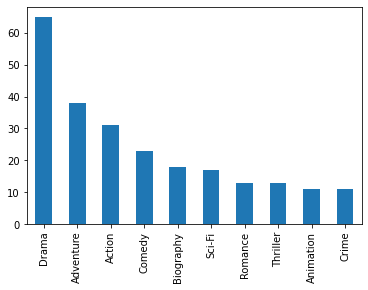

In [0]:
# Countplot for genres

genre_top10.cnt.plot.bar()


**`Checkpoint 5:`** Is the bar for `Drama` the tallest? **Yes**

In [0]:
# find the most popular genre



-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

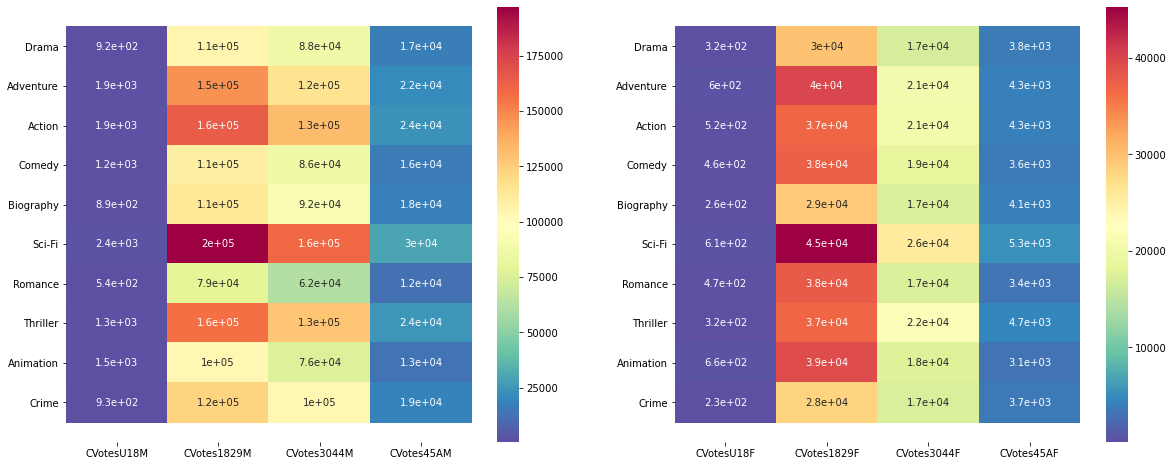

In [0]:
# 1st set of heat maps for CVotes-related columns

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
heatmap_m = sns.heatmap(genre_top10.iloc[:,13:23:3],annot=True,cmap="Spectral_r")
bottom, top = heatmap_m.get_ylim()
heatmap_m.set_ylim(bottom + 0.5, top - 0.5)
plt.subplot(1,2,2)
heatmap_f = sns.heatmap(genre_top10.iloc[:,14:24:3],annot=True,cmap="Spectral_r")
bottom, top = heatmap_f.get_ylim()
heatmap_f.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**: Sci-Fi also appears to be the most popular category among males and females of age 30-44 and above 45 as well (also applies for males and females of age under 18)

- **Inference 2**: Thriller and action seem to the second and adventure seems to be the third favourtie category among males of age 18-29 (animation seems to be the least favourite) whereas adventure seems to be the second and animation seems to be the thrid favourite category among females of age 18-29 (crime seems to be the least favourite). This implies that males of age 18-29 would rather watch any other genre of movie than animation whereas the females of age 18-29 would rather watch any other genre of movie than crime 

- **Inference 3**: Males of age under 18 like romantic movies the least whereas thats not the case with females under 18, who like crime movies the least.

- **Inference 4**: Crime movies are generally the least favourite among females of all ages except when they turn above 45. They somehow like crime movies more than animated movies which used to be their favourite in their younger days. 

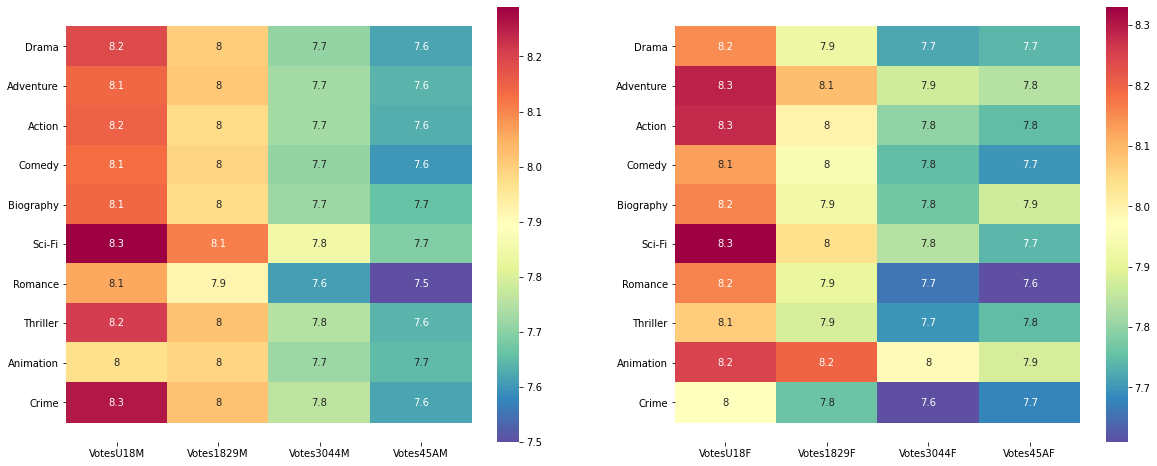

In [0]:
# 2nd set of heat maps for Votes-related columns

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
heatmap_m = sns.heatmap(genre_top10.iloc[:,30:40:3],annot=True,cmap="Spectral_r")
bottom, top = heatmap_m.get_ylim()
heatmap_m.set_ylim(bottom + 0.5, top - 0.5)
plt.subplot(1,2,2)
heatmap_f = sns.heatmap(genre_top10.iloc[:,31:41:3],annot=True,cmap="Spectral_r")
bottom, top = heatmap_f.get_ylim()
heatmap_f.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- **Inference 1**:Sci-Fi appears to be the highest rated genre in males of all age groups whereas for females, after being 18+, the highest rated genre becomes animation for all other age groups.

- **Inference 2**: For males, animated movies are the least rated for age group under 18 whereas romantic movies become the least rated for all other age groups. For females, crime movies remain the least rated for all age groups except 45+ where that place is shockingly taken by romantic movies

- **Inference 3**:In general, people, irrespective of age and gender like movies more when they are younger and that liking and the tendency to give higher rating decreases over time, thereby decreasing the average rating of age groups if we go from under 18 to 45+

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [0]:
# Creating IFUS column
#initializing all columns with USA

movies["IFUS"] = "USA" 

#changing all values where country != USA
movies.loc[movies["Country"] != "USA","IFUS"] = "non-USA" 
movies


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,facebook_likes_combined,IFUS
0,La La Land,2016,30.0,151.101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,0.0,...,7.5,7.1,8.3,8.1,PG-13,USA,121.101803,8.75,33000.0,USA
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.6,8.0,8.0,PG,USA,191.268248,7.95,57800.0,USA
2,Lion,2016,12.0,51.738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,8.4,7.1,8.1,8.0,PG-13,Australia,39.738905,7.50,138800.0,non-USA
3,Arrival,2016,47.0,100.546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,0.0,...,7.7,7.3,8.0,7.9,PG-13,USA,53.546139,8.05,40300.0,USA
4,Manchester by the Sea,2016,9.0,47.695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.6,7.1,7.9,7.8,R,USA,38.695371,8.75,74818.0,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Whiplash,2014,3.3,13.092000,J.K. Simmons,Melissa Benoist,Chris Mulkey,24000,970.0,535.0,...,8.2,8.0,8.6,8.4,R,USA,9.792000,8.65,25505.0,USA
96,Before Midnight,2013,3.0,8.114507,Seamus Davey-Fitzpatrick,Ariane Labed,Athina Rachel Tsangari,140,63.0,48.0,...,7.2,7.0,8.0,7.9,R,USA,5.114507,8.65,251.0,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10,143.0,USA
98,Harry Potter and the Deathly Hallows: Part I,2010,150.0,296.347721,Rupert Grint,Toby Jones,Alfred Enoch,10000,2000.0,1000.0,...,8.0,6.7,7.9,7.5,PG-13,UK,146.347721,7.10,13000.0,non-USA


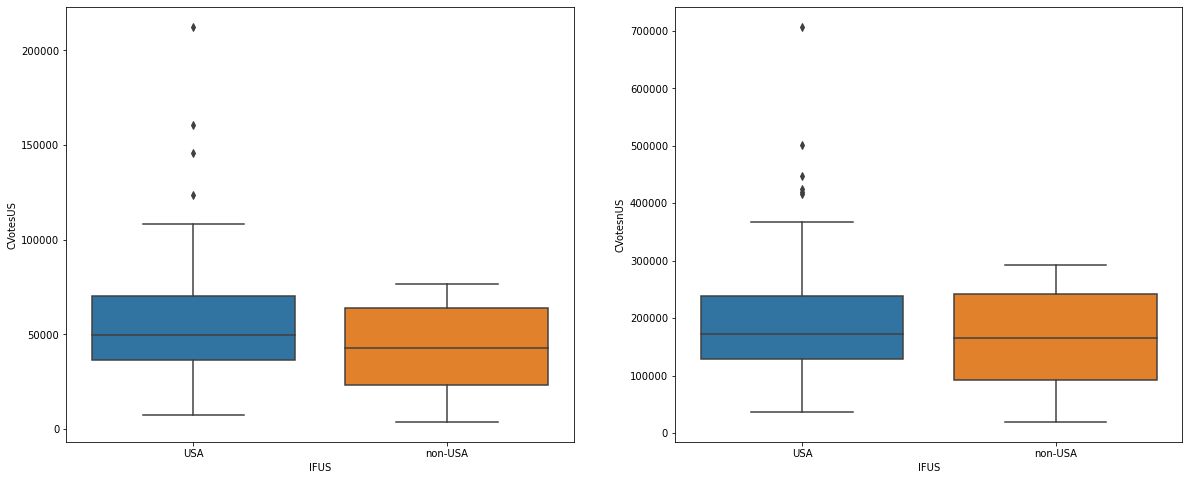

In [0]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x=movies["IFUS"],y=movies["CVotesUS"])
plt.subplot(1,2,2)
sns.boxplot(x=movies["IFUS"],y=movies["CVotesnUS"])
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: From both plots, we can see that non-USA plot's IQR is slightly larger thant USA people plot
- Inference 2: From both plots, there seem to be some outliers in USA plot, suggesting that some USA movies got exceptionally high votes from USA and non-USA people

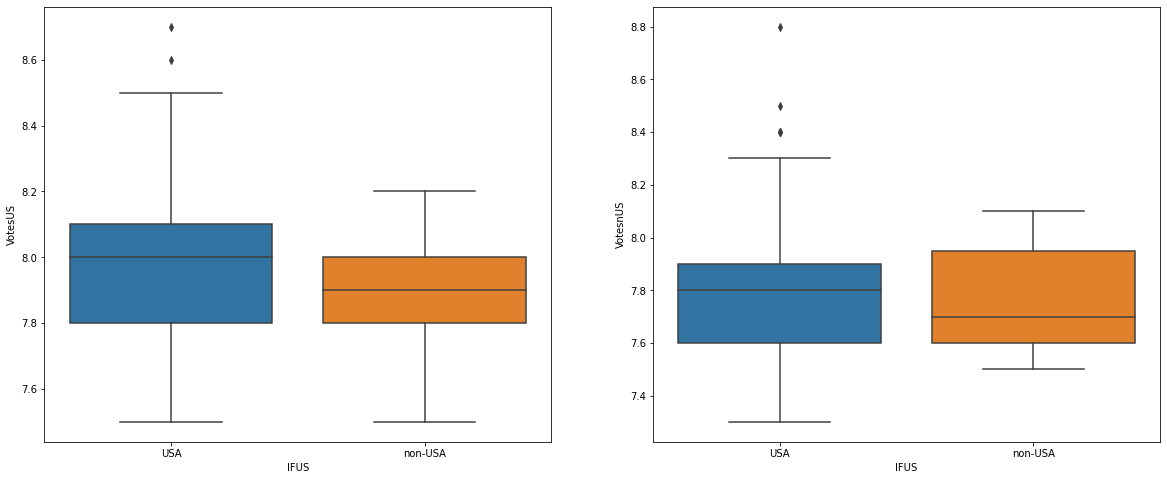

In [0]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x=movies["IFUS"],y=movies["VotesUS"])
plt.subplot(1,2,2)
sns.boxplot(x=movies["IFUS"],y=movies["VotesnUS"])
plt.show()


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: From both plots, we can see that there are some USA movies that have got exceptionally high rating from USA and non-USA people (outliers in USA plot)
- Inference 2: From both plots, USA people have roughly given ratings to non-USA movies in range (7.8-8) and USA movies in range (7.8-8.1) whereas non-USA people have roughly given ratings to non-USA movies in range(7.6-8) and USA movies in range(7.6-7.9). There seems to be trend here that states that USA people will rate USA movies higher and non-USA people will rate non-USA movies higher

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [0]:
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Drama,52375.0,75928.0,109339.0,66456.0,23528.0,8497.0,3622.0,2078.0,1449.0,3250.0,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Adventure,94596.0,105636.0,138482.0,86367.0,31896.0,11551.0,4817.0,2718.0,1835.0,4575.0,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Action,102144.0,114433.0,150895.0,94262.0,34688.0,12693.0,5386.0,3064.0,2115.0,5524.0,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Comedy,60157.0,77173.0,108993.0,69176.0,26099.0,9863.0,4237.0,2444.0,1712.0,3842.0,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333.0,77867.0,123948.0,74054.0,23644.0,7702.0,2984.0,1639.0,1145.0,2849.0,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Sci-Fi,136781.0,148873.0,176646.0,106005.0,39518.0,14951.0,6583.0,3876.0,2715.0,6731.0,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Romance,42304.0,53037.0,82252.0,54833.0,21637.0,8530.0,3762.0,2130.0,1476.0,3082.0,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0
Thriller,83207.0,112730.0,153336.0,90446.0,32003.0,11534.0,5021.0,2918.0,1982.0,4433.0,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Animation,61960.0,72566.0,104837.0,65707.0,22825.0,7551.0,2792.0,1430.0,911.0,2290.0,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Crime,52229.0,87919.0,129045.0,74671.0,25308.0,8971.0,3842.0,2246.0,1544.0,3383.0,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0


In [0]:
# Sorting by CVotes1000
genre_top10.sort_values(by='CVotes1000',ascending=False)


,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Sci-Fi,136781.0,148873.0,176646.0,106005.0,39518.0,14951.0,6583.0,3876.0,2715.0,6731.0,...,7.86,7.85,7.84,7.71,7.69,7.74,7.52,8.09,7.88,17.0
Action,102144.0,114433.0,150895.0,94262.0,34688.0,12693.0,5386.0,3064.0,2115.0,5524.0,...,7.74,7.73,7.80,7.65,7.63,7.75,7.30,7.99,7.76,31.0
Thriller,83207.0,112730.0,153336.0,90446.0,32003.0,11534.0,5021.0,2918.0,1982.0,4433.0,...,7.74,7.75,7.70,7.66,7.64,7.75,7.40,7.93,7.81,13.0
Adventure,94596.0,105636.0,138482.0,86367.0,31896.0,11551.0,4817.0,2718.0,1835.0,4575.0,...,7.75,7.73,7.87,7.68,7.64,7.84,7.38,7.99,7.79,38.0
Crime,52229.0,87919.0,129045.0,74671.0,25308.0,8971.0,3842.0,2246.0,1544.0,3383.0,...,7.72,7.76,7.61,7.63,7.62,7.68,7.39,7.98,7.80,11.0
Comedy,60157.0,77173.0,108993.0,69176.0,26099.0,9863.0,4237.0,2444.0,1712.0,3842.0,...,7.71,7.71,7.75,7.61,7.60,7.70,7.19,7.94,7.78,23.0
Biography,47333.0,77867.0,123948.0,74054.0,23644.0,7702.0,2984.0,1639.0,1145.0,2849.0,...,7.73,7.72,7.77,7.69,7.66,7.87,7.23,7.93,7.77,18.0
Drama,52375.0,75928.0,109339.0,66456.0,23528.0,8497.0,3622.0,2078.0,1449.0,3250.0,...,7.71,7.71,7.72,7.64,7.62,7.74,7.22,7.94,7.78,65.0
Animation,61960.0,72566.0,104837.0,65707.0,22825.0,7551.0,2792.0,1430.0,911.0,2290.0,...,7.76,7.72,7.98,7.68,7.65,7.88,7.27,7.96,7.83,11.0
Romance,42304.0,53037.0,82252.0,54833.0,21637.0,8530.0,3762.0,2130.0,1476.0,3082.0,...,7.61,7.61,7.66,7.52,7.50,7.61,6.92,7.83,7.70,13.0


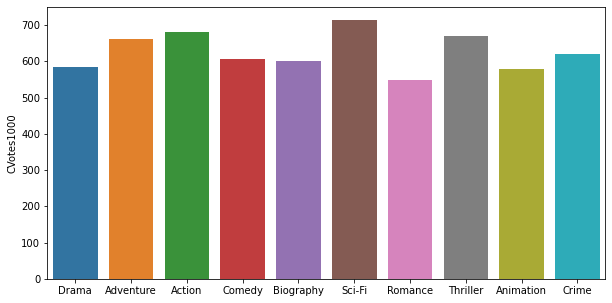

In [0]:
# Bar plot

plt.figure(figsize=(10,5))
sns.barplot(x=genre_top10.index,y=genre_top10["CVotes1000"])

**`Inferences:`** Write your inferences/observations here.
- 1 Sci-Fi still seems to be the highest voted category here as well, as was the case in case of heatmaps
- 2 Same trends seen in the heatmaps are seen here with regards to adventure, action and thriller as them being the next voted genres

**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.

## Now complete following scenarios

In [0]:
# Scenario 1: Top 10 movies by IMDb rating

TODO


In [0]:
# Scenario 2: Movies released after 2010 with rating above 8

TODO


In [0]:
# Scenario 3: Average rating by genre (splitting genres into individual entries)

TODO


In [0]:
# Scenario 4: Number of movies released each year

TODO


In [0]:
# Scenario 5: Top 5 directors with highest average IMDb rating (minimum 5 movies)

TODO


In [0]:
# Scenario 6: Movies grouped by content rating and their average durations

TODO


In [0]:
# Scenario 7: Year with the most movie releases

TODO


In [0]:
# Scenario 8: Longest movie per genre

TODO


In [0]:
# Scenario 9: Movies with budget greater than revenue (loss-making)

TODO


In [0]:
# Scenario 10: Most common actor/actress (based on appearances in actor_1_name, actor_2_name, actor_3_name)

TODO
